# –ü—Ä–æ–µ–∫—Ç –ø–æ –∫—É—Ä—Å—É DS-prof-2022-08 OTUS –Ω–∞ —Ç–µ–º—É

## –ü—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –Ω–∞—Å—Ç—É–ø–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ —Å–æ–±—ã—Ç–∏—è –Ω–∞ —Ç—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥–∞—Ö —Ä–µ—Å—É—Ä—Å–æ—Å–Ω–∞–±–∂–∞—é—â–∏–π –æ—Ä–≥–∞–Ω–∏–∑–∞—Ü–∏–∏

# –ü–ª–∞–Ω –ø—Ä–æ–µ–∫—Ç–∞
1. –ü–æ–¥–≥–æ—Ç–æ–≤–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –¥–ª—è EDA
2. –ü—Ä–æ–≤–µ—Å—Ç–∏ EDA
3. –ü–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º EDA –ø—Ä–æ–≤–µ—Å—Ç–∏ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è
4. –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ
5. –û–±—Ä–∞–±–æ—Ç–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
6. –í—ã–≤–æ–¥

# –ò–º–ø–æ—Ä—Ç—ã

In [1]:
import os
import glob
import pathlib
from pathlib import Path

import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import phik

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import catboost
from catboost import CatBoostClassifier
#from catboost import Pool

C:\Users\smndy\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# EDA. –û—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö, –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞—Ç–∞-—Ñ—Ä–µ–π–º–∞ –¥–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è

## –ü–æ–¥–≥—Ç–æ–≤–∫–∞ –∫ EDA

In [2]:
#–∫–∞—Ç–∞–ª–æ–≥ —Å –¥–∞—Ç–∞-—Ñ—Ä–µ–π–º–∞–º–∏
dir_tabl = r'C:\Users\smndy\Documents\skillfactory\OTUS DS\–ü—Ä–æ–µ–∫—Ç\data'

In [3]:
#—Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –∏–º–µ–Ω –ª–∏—Å—Ç–æ–≤
def get_name_sheets_excel(dir_tabl, file_xlsx):
    path_file_xlsx_open = Path(dir_tabl, file_xlsx)
    xls = pd.ExcelFile(path_file_xlsx_open)
    name_sheets_excel = xls.sheet_names
    return print(name_sheets_excel)

#—Ñ—É–Ω–∫—Ü–∏—è –∑–∞–ø–∏—Å–∏ –µ–∫—Å–µ–ª—å —Ç–∞–±–ª–∏—Ü—ã –≤ –¥–∞—Ç–∞-—Ñ—Ä–µ–π–º
def open_name_sheets_excel(dir_tabl, file_xlsx, name_sheets):
    path_file_xlsx_open = Path(dir_tabl, file_xlsx)
    xls = pd.ExcelFile(path_file_xlsx_open)
    data = xls.parse('Sheet1')
    return data

In [4]:
file_xlsx = r'df_seti.xlsx'
get_name_sheets_excel(dir_tabl = dir_tabl, file_xlsx = file_xlsx)

['Sheet1']


In [5]:
data = open_name_sheets_excel(dir_tabl = dir_tabl, file_xlsx = file_xlsx,  name_sheets = 'Sheet1')
df_seti = data.copy()

In [6]:
df_seti.head(3)

Unnamed: 0           –ö–æ–¥  –ò–Ω–≤–µ–Ω—Ç–∞—Ä–Ω—ã–π –Ω–æ–º–µ—Ä  \
0         234  03200_102_–±/—Ö           102_–±/—Ö   
1         243  03200_100_–±/—Ö           100_–±/—Ö   
2         245   03200_98_–±/—Ö            98_–±/—Ö   

                                        –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ  \
0  –°–µ—Ç—å —Ö–æ–ª–æ–¥–Ω–æ–≥–æ –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏—è –æ—Ç –í–ö-1 (—Å—É—â) —É –∂...   
1  –°–µ—Ç–∏ —Ö–æ–ª–æ–¥–Ω–æ–≥–æ –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏—è –ø–æ —É–ª. –ù–æ–≤–æ—Ä–∂–µ–≤—Å–∫...   
2                     –ê–≤—Ç–æ–∑–∞–≤–æ–¥—Å–∫–∞—è,4 –≤–≤–æ–¥ –Ω–∞ –¶–¢–ü-41   

  –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –≤–∏–¥–∞ –æ–±—ä–µ–∫—Ç–∞ –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞  \
0      –¢—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥ –Ω–∞–ø–æ—Ä–Ω—ã–π           –ö–ò–†–û–í–°–ö–ò–ô   
1      –¢—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥ –Ω–∞–ø–æ—Ä–Ω—ã–π           –ö–ò–†–û–í–°–ö–ò–ô   
2      –¢—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥ –Ω–∞–ø–æ—Ä–Ω—ã–π           –ö–ò–†–û–í–°–ö–ò–ô   

        –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é  \
0  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3                01.01.1970   
1  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3                01.01.1970   
2  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3                01.01.1970   

  –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞  –î–ª–∏–Ω–∞, –ø–æ–≥.–º.  \
0                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏          36.86   
1                  —Å—Ç–∞–ª—å                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏         755.00   
2                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏         202.80   

   –î–∏–∞–º–µ—Ç—Ä, –º–º.  
0         100.0  
1         200.0  
2         200.0

In [7]:
df_seti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6117 entries, 0 to 6116
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             6117 non-null   int64  
 1   –ö–æ–¥                                    6117 non-null   object 
 2   –ò–Ω–≤–µ–Ω—Ç–∞—Ä–Ω—ã–π –Ω–æ–º–µ—Ä                      6117 non-null   object 
 3   –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ                           6117 non-null   object 
 4   –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –≤–∏–¥–∞ –æ–±—ä–µ–∫—Ç–∞              6117 non-null   object 
 5   –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞                    6117 non-null   object 
 6   –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è             6117 non-null   object 
 7   –î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é              6117 non-null   object 
 8   –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞                 6117 non-null   object 
 9   

In [8]:
df_seti.columns

Index(['Unnamed: 0', '–ö–æ–¥ ', '–ò–Ω–≤–µ–Ω—Ç–∞—Ä–Ω—ã–π –Ω–æ–º–µ—Ä', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –≤–∏–¥–∞ –æ–±—ä–µ–∫—Ç–∞', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è', '–î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞',
       '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', '–î–∏–∞–º–µ—Ç—Ä, –º–º.'],
      dtype='object')

In [9]:
file_xlsx = r'df_target_sobitiya.xlsx'
get_name_sheets_excel(dir_tabl = dir_tabl, file_xlsx = file_xlsx)

['Sheet1']


In [10]:
data = open_name_sheets_excel(dir_tabl = dir_tabl, file_xlsx = file_xlsx,  name_sheets = 'Sheet1')
df_target_sobitiya = data.copy()

In [11]:
df_target_sobitiya.head(3)

Unnamed: 0 –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ [–∑–∞—è–≤–∫–∏]  \
0           0               2018-03-21 00:00:00   
1           1               2018-01-02 00:00:00   
2           2               2018-01-02 00:00:00   

  –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è —Å–æ–∑–¥–∞–Ω–∏—è [–∑–∞—è–≤–∫–∏]  –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å, —á [–∑–∞—è–≤–∫–∏]  –ù–æ–º–µ—Ä [–∑–∞—è–≤–∫–∏]  \
0            2018-03-21 00:00:00                 49.209167          226184   
1            2018-01-02 00:00:00                189.864722          218618   
2            2018-01-02 00:00:00                 11.211944          218631   

                                     –û–±—ä–µ–∫—Ç [–∑–∞—è–≤–∫–∏] –ü—Ä–æ—è–≤–ª–µ–Ω–∏–µ [–∑–∞—è–≤–∫–∏]  \
0  –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (04...     –£—Ç–µ—á–∫–∞ –∏–∑ –∑–µ–º–ª–∏   
1  –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (03...     –£—Ç–µ—á–∫–∞ –∏–∑ –∑–µ–º–ª–∏   
2  –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (04...     –£—Ç–µ—á–∫–∞ –∏–∑ –∑–µ–º–ª–∏   

  –¢–∏–ø —Å–∏—Å—Ç–µ–º—ã [–∑–∞—è–≤–∫–∏]   –ù–æ–º–µ—Ä         date_time_x  ...    –ò–Ω–≤–µ–Ω—Ç–∞—Ä–Ω—ã–π –Ω–æ–º–µ—Ä  \
0        –í–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ  226184 2018-03-21 15:00:00  ...  04208_–≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ   
1        –í–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ  218618 2018-01-02 16:00:00  ...  03200_–≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ   
2        –í–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏–µ  218631 2018-01-02 19:00:00  ...  04208_–≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ   

                                        –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ  \
0  –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (04...   
1  –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (03...   
2  –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (04...   

  –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –≤–∏–¥–∞ –æ–±—ä–µ–∫—Ç–∞  –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞  \
0      –¢—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥ –Ω–∞–ø–æ—Ä–Ω—ã–π         –°–í–ï–†–î–õ–û–í–°–ö–ò–ô   
1      –¢—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥ –Ω–∞–ø–æ—Ä–Ω—ã–π            –ö–ò–†–û–í–°–ö–ò–ô   
2      –¢—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥ –Ω–∞–ø–æ—Ä–Ω—ã–π         –°–í–ï–†–î–õ–û–í–°–ö–ò–ô   

        –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è  –î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é  \
0     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4                 01.01.1950   
1  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3                 01.01.1950   
2     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4                 01.01.1950   

   –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞ –î–ª–∏–Ω–∞, –ø–æ–≥.–º.  \
0                   —á—É–≥—É–Ω                         –í–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω–æ–µ         54.98   
1                   —á—É–≥—É–Ω                         –í–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω–æ–µ         54.98   
2                   —á—É–≥—É–Ω                         –í–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω–æ–µ         54.98   

  –î–∏–∞–º–µ—Ç—Ä, –º–º.  
0        100.0  
1        100.0  
2        100.0  

[3 rows x 42 columns]

In [12]:
df_target_sobitiya.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Unnamed: 0                             9152 non-null   int64         
 1   –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ [–∑–∞—è–≤–∫–∏]      9152 non-null   object        
 2   –î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è —Å–æ–∑–¥–∞–Ω–∏—è [–∑–∞—è–≤–∫–∏]         9152 non-null   object        
 3   –î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å, —á [–∑–∞—è–≤–∫–∏]               9114 non-null   float64       
 4   –ù–æ–º–µ—Ä [–∑–∞—è–≤–∫–∏]                         9152 non-null   int64         
 5   –û–±—ä–µ–∫—Ç [–∑–∞—è–≤–∫–∏]                        9152 non-null   object        
 6   –ü—Ä–æ—è–≤–ª–µ–Ω–∏–µ [–∑–∞—è–≤–∫–∏]                    9152 non-null   object        
 7   –¢–∏–ø —Å–∏—Å—Ç–µ–º—ã [–∑–∞—è–≤–∫–∏]                   9152 non-null   object        
 8   –ù–æ–º–µ—Ä   

In [13]:
df_target_sobitiya.columns

Index(['Unnamed: 0', '–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ [–∑–∞—è–≤–∫–∏]',
       '–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è —Å–æ–∑–¥–∞–Ω–∏—è [–∑–∞—è–≤–∫–∏]', '–î–ª–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å, —á [–∑–∞—è–≤–∫–∏]',
       '–ù–æ–º–µ—Ä [–∑–∞—è–≤–∫–∏]', '–û–±—ä–µ–∫—Ç [–∑–∞—è–≤–∫–∏]', '–ü—Ä–æ—è–≤–ª–µ–Ω–∏–µ [–∑–∞—è–≤–∫–∏]',
       '–¢–∏–ø —Å–∏—Å—Ç–µ–º—ã [–∑–∞—è–≤–∫–∏]', '–ù–æ–º–µ—Ä', 'date_time_x',
       '–î–∞—Ç–∞ –∏ –≤—Ä–µ–º—è —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏', 'date_time_range', 'date_time_y', 'T', 'Po',
       'Pa', 'U', 'N', 'W1', 'W2', 'VV', 'Td', 'E'', 'sss', 'year', 'date',
       'month', 'N_code', 'W1_code', 'W2_code', 'sss_code', '–ö–æ–¥ ',
       '–ò–Ω–≤–µ–Ω—Ç–∞—Ä–Ω—ã–π –Ω–æ–º–µ—Ä', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –≤–∏–¥–∞ –æ–±—ä–µ–∫—Ç–∞',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è',
       '–î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω

In [14]:
df_target_sobitiya.shape

(9152, 42)

In [15]:
df_target_sobitiya_columns = ['–ù–æ–º–µ—Ä', '–û–±—ä–µ–∫—Ç [–∑–∞—è–≤–∫–∏]']
df_target_sobitiya[df_target_sobitiya_columns]

–ù–æ–º–µ—Ä                                    –û–±—ä–µ–∫—Ç [–∑–∞—è–≤–∫–∏]
0     226184  –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (04...
1     218618  –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (03...
2     218631  –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (04...
3     218654     –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –±–µ—Å—Ö–æ–∑–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (03200)
4     218658     –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –±–µ—Å—Ö–æ–∑–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (03200)
...      ...                                                ...
9147  412221  –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (04...
9148  412231  –ø–æ –ì–∞—à–∫–æ–≤–∞41 –Ω–∞ –¶–¢–ü-4–æ—Ç –í-2–¥–æ–í–ö–¥–æ–º–∞33 d200,l15...
9149  412235     –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –±–µ—Å—Ö–æ–∑–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (04208)
9150  412236                   –ø–æ –°—ã—Å–æ–ª—å—Å–∫–∞—è 8–∞ –¶–¢–ü d150,l155.9
9151  412228  –°–µ—Ç–∏ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –≤–µ–¥–æ–º—Å—Ç–≤–µ–Ω–Ω—ã–µ –±–µ–∑ –æ–±—ä–µ–∫—Ç–∞ (04...

[9152 rows x 2 columns]

In [16]:
df_seti_s_sobitiyami = df_seti.merge(df_target_sobitiya[df_target_sobitiya_columns], 
              how = 'left', left_on = '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ', right_on = '–û–±—ä–µ–∫—Ç [–∑–∞—è–≤–∫–∏]')

In [17]:
df_seti_s_sobitiyami = df_seti_s_sobitiyami.drop(columns = ['Unnamed: 0', '–û–±—ä–µ–∫—Ç [–∑–∞—è–≤–∫–∏]', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ'])

In [18]:
df_seti_s_sobitiyami_groupby = df_seti_s_sobitiyami.groupby('–ö–æ–¥ ')[['–ù–æ–º–µ—Ä']].count()

In [19]:
df_seti_s_sobitiyami_groupby = df_seti_s_sobitiyami_groupby.reset_index()

In [20]:
df_seti_s_sobitiyami_groupby

–ö–æ–¥   –ù–æ–º–µ—Ä
0                 000005_–∫      0
1                 000006_–∫      0
2                 000007_–∫      1
3                 000009_–∫      2
4                 000043_–∫      0
...                    ...    ...
6112  –§–ì–ë–£ –¶–ñ–ö–£¬† 04208_–≤–µ–¥      0
6113           –¶–û-00001076      0
6114           –¶–û-00001078      0
6115    –≠–Ω–µ—Ä–≥ –ø—Ä 04201_–≤–µ–¥      0
6116   –≠–Ω–µ—Ä–≥-–ü–ú¬† 04208_–≤–µ–¥      0

[6117 rows x 2 columns]

In [21]:
df_seti_count_sobitiya = df_seti.merge(df_seti_s_sobitiyami_groupby, how = 'left', on = '–ö–æ–¥ ')

In [22]:
df_seti_count_sobitiya = df_seti_count_sobitiya.drop(columns = 'Unnamed: 0')

array([[<AxesSubplot:title={'center':'–î–ª–∏–Ω–∞, –ø–æ–≥.–º.'}>,
        <AxesSubplot:title={'center':'–î–∏–∞–º–µ—Ç—Ä, –º–º.'}>],
       [<AxesSubplot:title={'center':'–ù–æ–º–µ—Ä'}>, <AxesSubplot:>]],
      dtype=object)

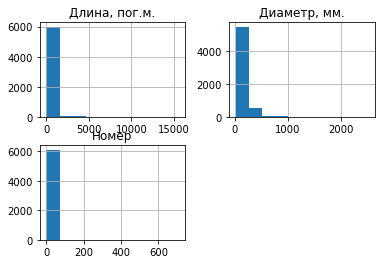

In [23]:
df_seti_count_sobitiya.hist()

In [24]:
df_seti_count_sobitiya[df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] > 0]['–ù–æ–º–µ—Ä'].value_counts(dropna=False, sort=True, ascending=False)

1      809
2      356
3      174
4      117
5       74
6       45
8       28
10      26
9       24
7       22
11      14
14       9
12       8
13       7
16       6
15       4
21       4
18       3
30       2
17       2
33       2
64       2
39       1
35       1
28       1
46       1
19       1
24       1
75       1
447      1
26       1
159      1
54       1
708      1
226      1
25       1
360      1
23       1
500      1
58       1
545      1
38       1
29       1
93       1
430      1
48       1
41       1
22       1
Name: –ù–æ–º–µ—Ä, dtype: int64

### –ù–æ–º–µ—Ä > 356 - 9 –ù–æ–º–µ—Ä > 174 - 8 –ù–æ–º–µ—Ä > 74 - 7 –ù–æ–º–µ—Ä > 28 - 6 –ù–æ–º–µ—Ä > 14 - 5 –ù–æ–º–µ—Ä > 9 - 4 –ù–æ–º–µ—Ä > 3 - 3 –ù–æ–º–µ—Ä > 0 - 2 –ù–æ–º–µ—Ä = 0 - 1

In [25]:
df_seti_count_sobitiya['target'] = ''

In [26]:
df_seti_count_sobitiya.loc[df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] > 356, 'target'] = 8
df_seti_count_sobitiya.loc[(df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] > 174) & (df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] <= 356), 'target'] = 7
df_seti_count_sobitiya.loc[(df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] > 74) & (df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] <= 174), 'target'] = 6
df_seti_count_sobitiya.loc[(df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] > 28) & (df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] <= 74), 'target'] = 5
df_seti_count_sobitiya.loc[(df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] > 14) & (df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] <= 28), 'target'] = 4
df_seti_count_sobitiya.loc[(df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] > 9) & (df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] <= 14), 'target'] = 3
df_seti_count_sobitiya.loc[(df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] > 3) & (df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] <= 9), 'target'] = 2
df_seti_count_sobitiya.loc[(df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] > 0) & (df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] <= 3), 'target'] = 1
df_seti_count_sobitiya.loc[df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] == 0, 'target'] = 0

In [27]:
df_seti_count_sobitiya['target'].value_counts(dropna=False, sort=True, ascending=False)

0    4353
1    1339
2     310
3      64
4      26
5      15
8       6
6       3
7       1
Name: target, dtype: int64

### –û–ø—Ä–µ–¥–µ–ª—é, —á—Ç–æ –≤—Å–µ —Å–µ—Ç–∏ —Å 'target' > 0 - "–ü–ª–æ—Ö–∏–µ" ('target_class' = 1)

In [28]:
df_seti_count_sobitiya['target_class'] = 0

In [29]:
df_seti_count_sobitiya.loc[df_seti_count_sobitiya['target'] > 0, 'target_class'] = 1

<AxesSubplot:>

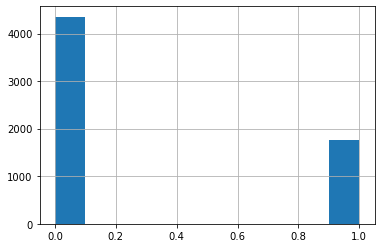

In [30]:
df_seti_count_sobitiya['target_class'].hist()

In [31]:
# –ø—Ä–æ—Ü–µ–Ω—Ç 
(df_seti_count_sobitiya[df_seti_count_sobitiya['–ù–æ–º–µ—Ä'] > 0]['–ù–æ–º–µ—Ä']
 .value_counts(dropna=False, sort=True, ascending=False)
 .sum())/df_seti_count_sobitiya.shape[0]

0.2883766552231486

## EDA

In [32]:
df_seti_count_sobitiya.head()

–ö–æ–¥  –ò–Ω–≤–µ–Ω—Ç–∞—Ä–Ω—ã–π –Ω–æ–º–µ—Ä  \
0  03200_102_–±/—Ö           102_–±/—Ö   
1  03200_100_–±/—Ö           100_–±/—Ö   
2   03200_98_–±/—Ö            98_–±/—Ö   
3   03200_96_–±/—Ö            96_–±/—Ö   
4   03200_95_–±/—Ö            95_–±/—Ö   

                                        –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ  \
0  –°–µ—Ç—å —Ö–æ–ª–æ–¥–Ω–æ–≥–æ –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏—è –æ—Ç –í–ö-1 (—Å—É—â) —É –∂...   
1  –°–µ—Ç–∏ —Ö–æ–ª–æ–¥–Ω–æ–≥–æ –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏—è –ø–æ —É–ª. –ù–æ–≤–æ—Ä–∂–µ–≤—Å–∫...   
2                     –ê–≤—Ç–æ–∑–∞–≤–æ–¥—Å–∫–∞—è,4 –≤–≤–æ–¥ –Ω–∞ –¶–¢–ü-41   
3  –í–≤–æ–¥ –≤–æ–¥–æ–ø—Ä–æ–≤–æ–¥–∞ –æ—Ç —Å—É—â–µ—Å—Ç–≤—É—é—â–µ–≥–æ –∫–æ–ª–æ–¥—Ü–∞ –ø–æ —É...   
4  –°–µ—Ç—å —Ö–æ–ª–æ–¥–Ω–æ–≥–æ –≤–æ–¥–æ—Å–Ω–∞–±–∂–µ–Ω–∏—è –ø–æ —É–ª. –ö–æ—Ç–µ–ª—å–Ω–∏—á–µ...   

  –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –≤–∏–¥–∞ –æ–±—ä–µ–∫—Ç–∞ –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞  \
0      –¢—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥ –Ω–∞–ø–æ—Ä–Ω—ã–π           –ö–ò–†–û–í–°–ö–ò–ô   
1      –¢—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥ –Ω–∞–ø–æ—Ä–Ω—ã–π           –ö–ò–†–û–í–°–ö–ò–ô   
2      –¢—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥ –Ω–∞–ø–æ—Ä–Ω—ã–π           –ö–ò–†–û–í–°–ö–ò–ô   
3      –¢—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥ –Ω–∞–ø–æ—Ä–Ω—ã–π           –ö–ò–†–û–í–°–ö–ò–ô   
4      –¢—Ä—É–±–æ–ø—Ä–æ–≤–æ–¥ –Ω–∞–ø–æ—Ä–Ω—ã–π           –ö–ò–†–û–í–°–ö–ò–ô   

        –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é  \
0  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3                01.01.1970   
1  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3                01.01.1970   
2  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3                01.01.1970   
3  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3                01.01.1970   
4  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3                01.01.1970   

  –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞  –î–ª–∏–Ω–∞, –ø–æ–≥.–º.  \
0                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏          36.86   
1                  —Å—Ç–∞–ª—å                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏         755.00   
2                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏         202.80   
3                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏         198.40   
4                  —Å—Ç–∞–ª—å                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏         328.26   

   –î–∏–∞–º–µ—Ç—Ä, –º–º.  –ù–æ–º–µ—Ä target  target_class  
0         100.0      1      1             1  
1         200.0      1      1             1  
2         200.0      1      1             1  
3         200.0      0      0             0  
4         100.0      0      0             0

In [33]:
df_seti_count_sobitiya.columns

Index(['–ö–æ–¥ ', '–ò–Ω–≤–µ–Ω—Ç–∞—Ä–Ω—ã–π –Ω–æ–º–µ—Ä', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –≤–∏–¥–∞ –æ–±—ä–µ–∫—Ç–∞', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è', '–î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞',
       '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', '–î–∏–∞–º–µ—Ç—Ä, –º–º.', '–ù–æ–º–µ—Ä', 'target', 'target_class'],
      dtype='object')

In [34]:
df_seti_count_sobitiya.shape

(6117, 14)

In [35]:
df_seti_count_sobitiya.columns

Index(['–ö–æ–¥ ', '–ò–Ω–≤–µ–Ω—Ç–∞—Ä–Ω—ã–π –Ω–æ–º–µ—Ä', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –≤–∏–¥–∞ –æ–±—ä–µ–∫—Ç–∞', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è', '–î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞',
       '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', '–î–∏–∞–º–µ—Ç—Ä, –º–º.', '–ù–æ–º–µ—Ä', 'target', 'target_class'],
      dtype='object')

### —É–¥–∞–ª—é –∫–æ–ª–æ–Ω–∫–∏
- '–ö–æ–¥ ' = id;
- '–ò–Ω–≤–µ–Ω—Ç–∞—Ä–Ω—ã–π –Ω–æ–º–µ—Ä' = id;
- '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ' = —É–Ω–∏–∫–∞–ª—å–Ω–æ–µ –∏–º—è id;
- '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –≤–∏–¥–∞ –æ–±—ä–µ–∫—Ç–∞' - –Ω–µ –Ω–µ—Å–µ—Ç —Å–∏—ã—Å–ª–æ–≤–æ–π –Ω–∞–≥—Ä—É–∑–∫–∏;
- 'target' - –¥–ª—è –º—É–ª—å—Ç–∏–∫–ª–∞—Å—Å–æ–≤–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –≤ —ç—Ç–æ–º –ø—Ä–æ–µ–∫—Ç–µ –Ω–µ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ—Ç—Å—è —Ç–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥

### –∫–æ–ª–æ–Ω–∫–∏ –¥–ª—è –∏–∑—É—á–µ–Ω–∏—è —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–π
- '–ù–æ–º–µ—Ä' - —Å–∫–æ–ª—å–∫–æ –Ω–æ–º–µ—Ä–æ–≤ –∞–≤–∞—Ä–∏–π–Ω—ã—Ö –∑–∞—è–≤–æ–∫ –±—ã–ª–æ –∑–∞ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã–π –ø–µ—Ä–∏–æ–¥, –ø–µ—Ä–µ–∏–º–µ–Ω—É—é –≤ '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ' –∏ —É–¥–∞–ª—é –Ω–∞ —ç—Ç–∞–ø–µ –∫–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤;
- '–î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é' - –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –≤ —Å—Ä–æ–∫ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–∏, –≤ –µ–¥–∏–Ω–∏—Ü–∞—Ö –∏–∑–º–µ—Ä–µ–Ω–∏—è '–≥–æ–¥';

In [36]:
drop_list = ['–ö–æ–¥ ', '–ò–Ω–≤–µ–Ω—Ç–∞—Ä–Ω—ã–π –Ω–æ–º–µ—Ä', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ','–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –≤–∏–¥–∞ –æ–±—ä–µ–∫—Ç–∞', 'target']
df_seti_count_sobitiya.drop(columns = drop_list, inplace = True)

#### '–ù–æ–º–µ—Ä' - —Å–∫–æ–ª—å–∫–æ –Ω–æ–º–µ—Ä–æ–≤ –∞–≤–∞—Ä–∏–π–Ω—ã—Ö –∑–∞—è–≤–æ–∫ –±—ã–ª–æ –∑–∞ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º—ã–π –ø–µ—Ä–∏–æ–¥, –ø–µ—Ä–µ–∏–º–µ–Ω—É—é –≤ '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ' –∏ —É–¥–∞–ª—é –Ω–∞ —ç—Ç–∞–ø–µ –∫–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤;

In [37]:
df_seti_count_sobitiya.rename(columns = {'–ù–æ–º–µ—Ä': '–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ'}, inplace=True)

In [38]:
df_seti_count_sobitiya.head(1)

–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞       –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è  \
0           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   

  –î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞  \
0                01.01.1970                  —á—É–≥—É–Ω   

  –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞  –î–ª–∏–Ω–∞, –ø–æ–≥.–º.  –î–∏–∞–º–µ—Ç—Ä, –º–º.  \
0                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏          36.86         100.0   

   –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ  target_class  
0           1             1

#### '–î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é' - –ø–µ—Ä–µ–≤–µ—Å—Ç–∏ –≤ —Å—Ä–æ–∫ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–∏, –≤ –µ–¥–∏–Ω–∏—Ü–∞—Ö –∏–∑–º–µ—Ä–µ–Ω–∏—è '–≥–æ–¥'. –°—Ä–æ–∫ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–∏ –≤–æ–∑—å–º—É –æ—Ç  '–î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é' –ø–æ 31.12.2022 –≥

In [39]:
#–ø–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Å—Ç–æ–ª–±—Ü–∞ date
df_temp_date = df_seti_count_sobitiya['–î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é'].str.split('.', expand = True).rename(columns={0: 'DD', 1: 'MM', 2: 'YYYY'})
df_seti_count_sobitiya = pd.concat([df_seti_count_sobitiya, df_temp_date], axis = 1)
df_seti_count_sobitiya['date'] = pd.to_datetime(df_seti_count_sobitiya['DD'].astype(int).astype(str)+'-'
                            +df_seti_count_sobitiya['MM'].astype(int).astype(str)+'-'
                            +df_seti_count_sobitiya['YYYY'].astype(int).astype(str), format = '%d-%m-%Y').dt.date

df_seti_count_sobitiya['date'] = df_seti_count_sobitiya['date'].astype('datetime64')

#### data_set —Å–æ–∑–¥–∞—é –¥–∞—Ç–∞-—Å–µ—Ç —Å –∫–æ–ª–æ–Ω–∫–∞–º–∏
 - '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞', 
 - '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è', 
 - 'date', 
 - '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞', 
 - '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞', 
 - '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', 
 - '–î–∏–∞–º–µ—Ç—Ä, –º–º.', 
 - 'target_class'

In [40]:
data_set = df_seti_count_sobitiya[['–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è', 
                        'date', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞', 
                        '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞', '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', '–î–∏–∞–º–µ—Ç—Ä, –º–º.', 'target_class']].copy()

#### –ü–æ—Å—á–∏—Ç–∞—é –°—Ä–æ–∫ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–∏ –∏ –∑–∞–ø–∏—à—É –≤ –∫–æ–ª–æ–Ω–∫—É data_set['years']

In [41]:
data_set['final_date'] = '2022-12-31'
data_set['final_date'] = data_set['final_date'].astype('datetime64')

In [42]:
data_set['days'] = data_set['final_date'] - data_set['date']

In [43]:
data_set['years'] = data_set['days'].dt.days//365

#### –∏—Ç–æ–≥–æ–≤—ã–π data_set –¥–ª—è EDA

In [44]:
data_set = data_set[['target_class',
                     '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞', 
                     '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è',
                     '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞', 
                     '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞',
                     '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', 
                     '–î–∏–∞–º–µ—Ç—Ä, –º–º.',  
                     'years']].copy()

In [45]:
data_set.head(1)

target_class –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞       –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è  \
0             1           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   

  –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞  –î–ª–∏–Ω–∞, –ø–æ–≥.–º.  \
0                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏          36.86   

   –î–∏–∞–º–µ—Ç—Ä, –º–º.  years  
0         100.0     53

#### –ü–æ—Å–º–æ—Ç—Ä—é –æ—Å–Ω–æ–≤–Ω—ã–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ –∏—Å–ø–æ–ª—å–∑—É—é data_set

In [46]:
#—Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ—Å—Ç—Ä–æ–µ–Ω–∏—è histplot —Å hue
def graf(df, col, col_hue):
    return sns.histplot(data=df, x=df[col], hue=col_hue, multiple="dodge", shrink=0.8) 

In [47]:
data_set.shape

(6117, 8)

In [48]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6117 entries, 0 to 6116
Data columns (total 8 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   target_class                           6117 non-null   int64  
 1   –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞                    6117 non-null   object 
 2   –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è             6117 non-null   object 
 3   –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞                 6117 non-null   object 
 4   –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞  6117 non-null   object 
 5   –î–ª–∏–Ω–∞, –ø–æ–≥.–º.                          6117 non-null   float64
 6   –î–∏–∞–º–µ—Ç—Ä, –º–º.                           6117 non-null   float64
 7   years                                  6117 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 430.1+ KB


In [49]:
data_set.dtypes.value_counts()

object     4
int64      2
float64    2
dtype: int64

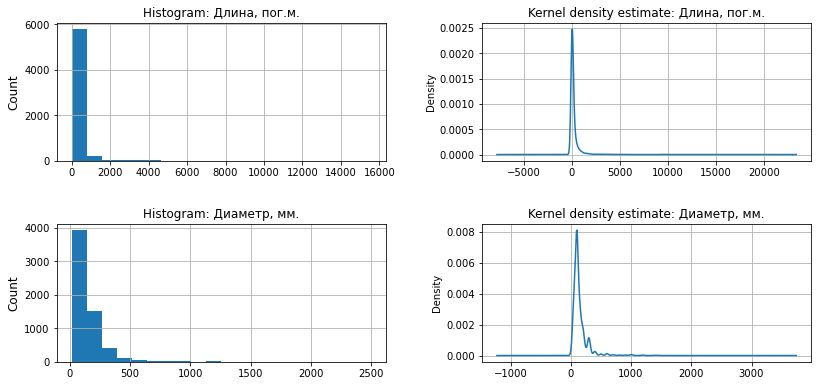

In [50]:
#–≥—Ä–∞—Ñ–∏–∫–∏ –¥–ª—è –∫–æ–ª–æ–Ω–æ–∫ 'float64'
columns = data_set.select_dtypes(['float64']).columns

fig, axs = plt.subplots(nrows=len(columns), ncols=2, figsize=(12,6))

for index, column in enumerate(columns):
    # –í –ø–µ—Ä–≤–æ–º —Å—Ç–æ–ª–±—Ü–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
    data_set[column].hist(ax=axs[index, 0], bins = 20)
    axs[index, 0].set_title(f'Histogram: {column}', fontsize=12)
    axs[index, 0].set_ylabel('Count', fontsize=12)
        
    # –í–æ –≤—Ç–æ—Ä–æ–º —Å—Ç–æ–ª–±—Ü–µ –≥—Ä–∞—Ñ–∏–∫ —Å–≥–ª–∞–∂–µ–Ω–Ω–æ–π –ø–ª–æ—Ç–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –Ω–∞ –æ—Å–Ω–æ–≤–µ —è–¥–µ—Ä–Ω–æ–π –æ—Ü–µ–Ω–∫–∏
    data_set[column].plot(kind='kde', ax=axs[index, 1])
    axs[index, 1].set_title(f'Kernel density estimate: {column}', fontsize=12)
    axs[index, 1].grid(True)

plt.tight_layout(pad=3.0)
plt.show()

#### '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.' –ø–æ—Å—Å–º–æ—Ç—Ä—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è <1000

<AxesSubplot:>

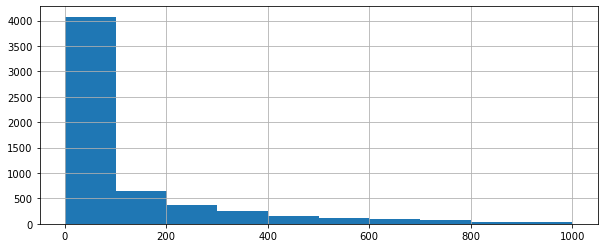

In [51]:
fig, ax = plt.subplots(figsize=(10,4))

data_set.loc[data_set['–î–ª–∏–Ω–∞, –ø–æ–≥.–º.'] < 1000, '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.'].hist()

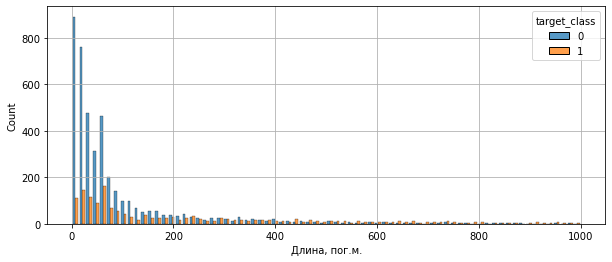

In [52]:
fig, ax = plt.subplots(figsize=(10,4))

ax = graf(data_set.loc[data_set['–î–ª–∏–Ω–∞, –ø–æ–≥.–º.'] < 1000], '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', 'target_class')
ax.grid(True)

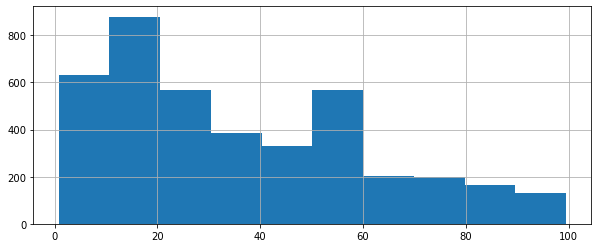

In [53]:
# '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.' –ø–æ—Å—Å–º–æ—Ç—Ä—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è <100
fig, ax = plt.subplots(figsize=(10,4))

ax = data_set.loc[data_set['–î–ª–∏–Ω–∞, –ø–æ–≥.–º.'] < 100, '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.'].hist()

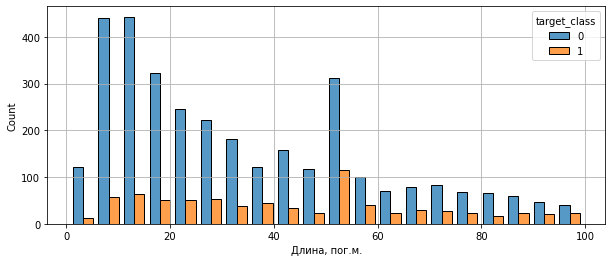

In [54]:
fig, ax = plt.subplots(figsize=(10,4))

ax = graf(data_set.loc[data_set['–î–ª–∏–Ω–∞, –ø–æ–≥.–º.'] < 100], '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', 'target_class')
ax.grid(True)

In [55]:
#### '–î–∏–∞–º–µ—Ç—Ä, –º–º.' –ø–æ—Å—Å–º–æ—Ç—Ä—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è <250

<AxesSubplot:>

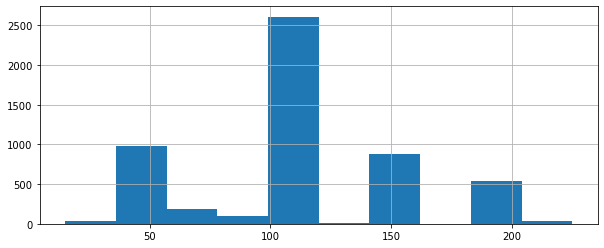

In [56]:
# '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.' –ø–æ—Å—Å–º–æ—Ç—Ä—é —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è <100
fig, ax = plt.subplots(figsize=(10,4))

data_set.loc[data_set['–î–∏–∞–º–µ—Ç—Ä, –º–º.'] < 250, '–î–∏–∞–º–µ—Ç—Ä, –º–º.'].hist()

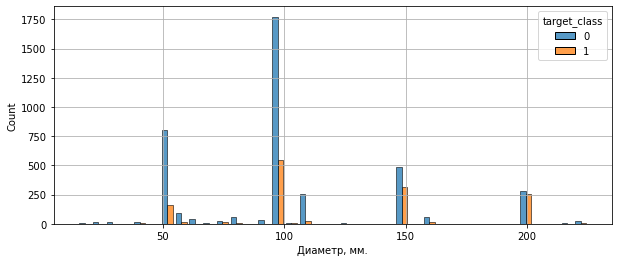

In [57]:
fig, ax = plt.subplots(figsize=(10,4))

ax = graf(data_set.loc[data_set['–î–∏–∞–º–µ—Ç—Ä, –º–º.'] < 250], '–î–∏–∞–º–µ—Ç—Ä, –º–º.', 'target_class')
ax.grid(True)

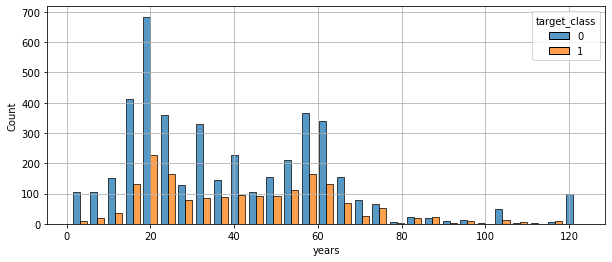

In [58]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≥–æ–¥–∞–º
fig, ax = plt.subplots(figsize=(10,4))

ax = graf(data_set, 'years', 'target_class')
ax.grid(True)

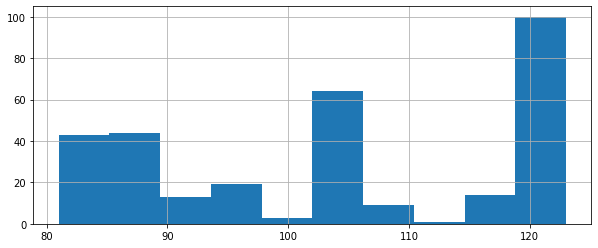

In [59]:
fig, ax = plt.subplots(figsize=(10,4))

ax = data_set.loc[data_set['years'] > 80, 'years'].hist() #-> –∑–∞–º–µ–Ω–∏—Ç—å –Ω–∞ –º–µ–¥–∏–∞

In [60]:
data_set['years'].median()

35.0

In [61]:
data_set.loc[data_set['years'] > 80, 'years'] = data_set['years'].median()

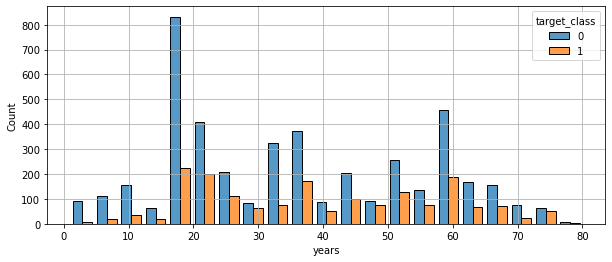

In [62]:
# —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≥–æ–¥–∞–º
fig, ax = plt.subplots(figsize=(10,4))

ax = graf(data_set, 'years', 'target_class')
ax.grid(True)

#### –í—ã–≤–æ–¥ —Ä–∞—Å—Å–º–æ—Ç—Ä–µ–Ω—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–Ω–∏—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ target_class

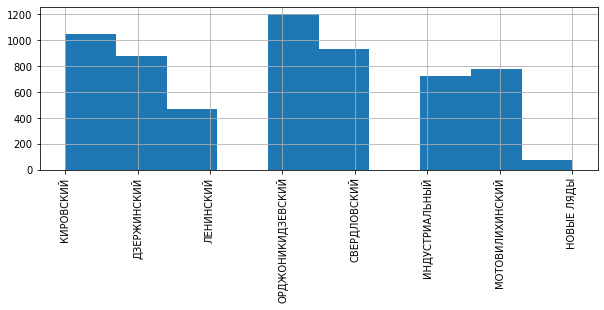

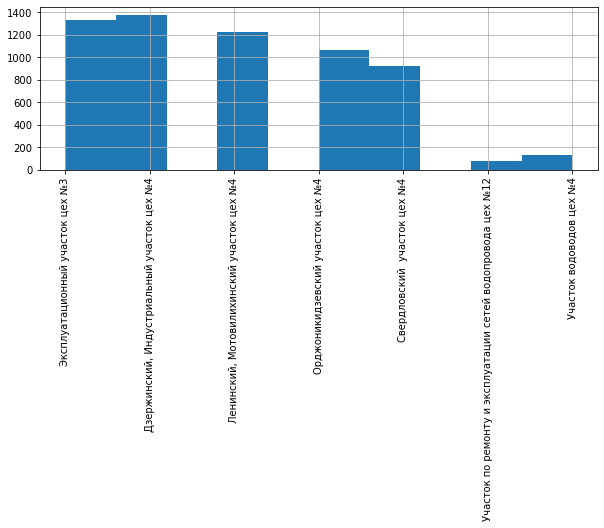

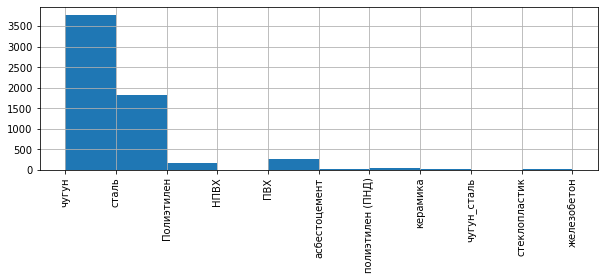

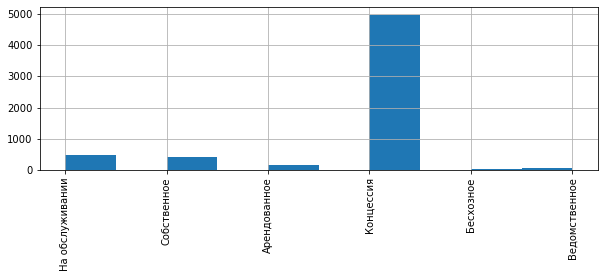

In [63]:
columns_temp = ['–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞','–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è',
                '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞']

for el in columns_temp:
    fig, ax = plt.subplots(figsize = (10,3))
    ax = data_set[el].hist()
    ax.tick_params(axis='x', labelrotation = 90)

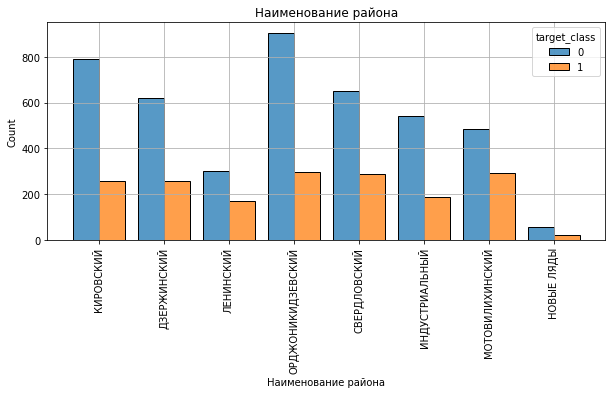

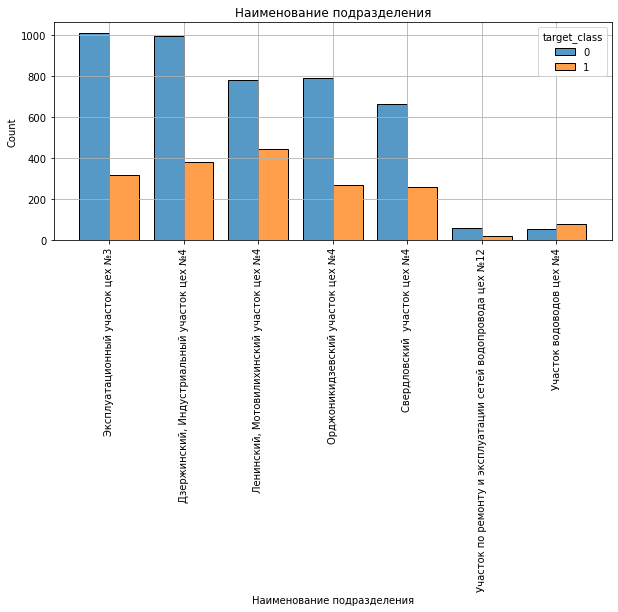

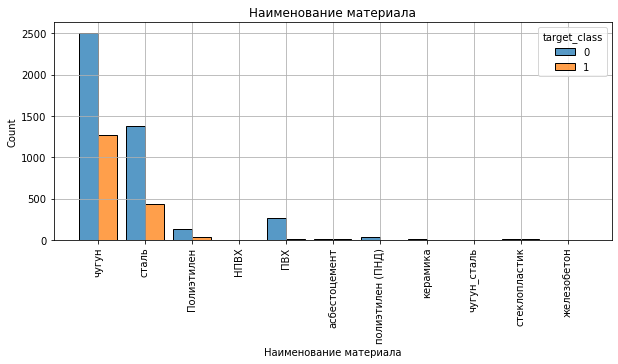

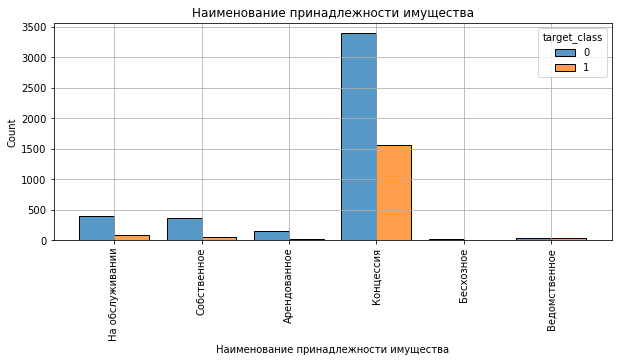

In [64]:
for column in columns_temp:
    # —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ –≥–æ–¥–∞–º
    fig, ax = plt.subplots(figsize=(10,4))
    ax = graf(data_set, column, 'target_class')
    ax.tick_params(axis='x', labelrotation = 90)
    ax.set_title(column)
    ax.grid(True)

#### –ú–∞—Ç—Ä–∏—Ü—ã –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π

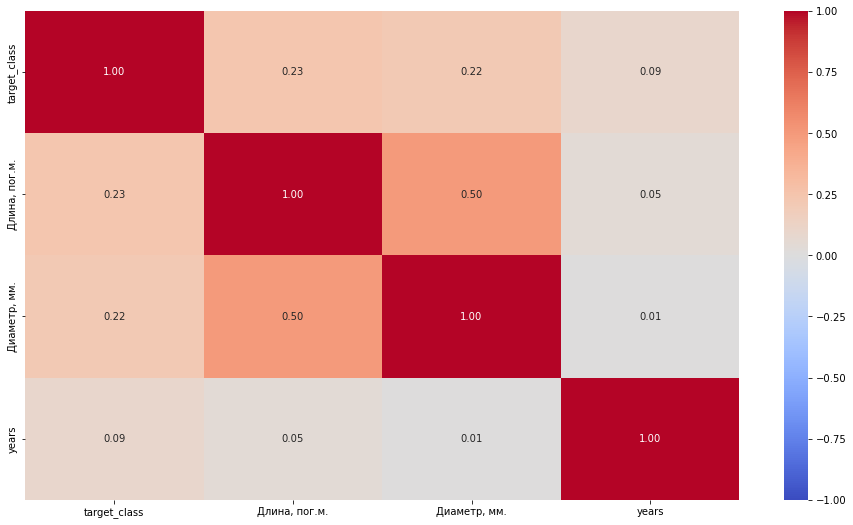

In [65]:
# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–∏
# Ex.: https://github.com/smddyakonov/otus_ds_dyakonov/blob/main/hw-4/hw_4_smndyakonov.ipynb, 231 —Å—Ç—Ä–æ–∫–∞
data_set.corr() # - –º–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π [–ø—Ä—è–º–æ–ª–∏–Ω–µ–π–Ω–∞—è —Å–≤—è–∑—å, y = kx +b]
plt.subplots(figsize=(16,9))
sns.heatmap(data_set.corr(), cmap=sns.color_palette("coolwarm", 10000), annot=True, fmt='.2f', vmin=-1, center=0)
plt.show()

interval columns not set, guessing: ['target_class', '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', '–î–∏–∞–º–µ—Ç—Ä, –º–º.', 'years']
interval columns not set, guessing: ['target_class', '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', '–î–∏–∞–º–µ—Ç—Ä, –º–º.', 'years']


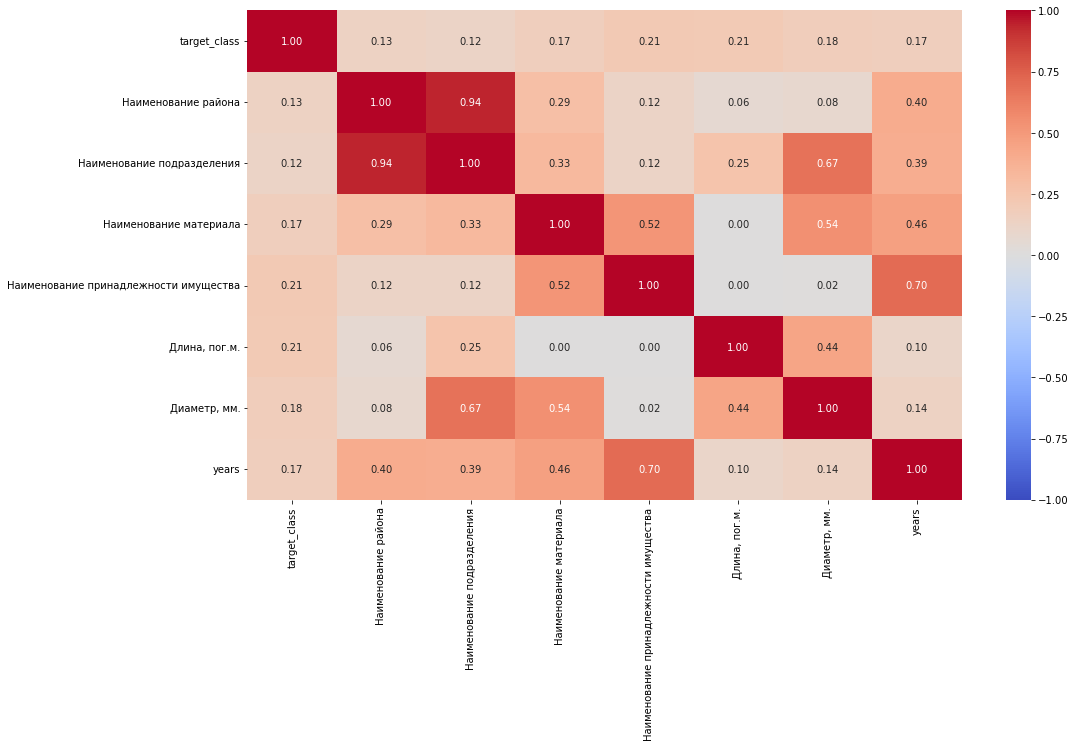

In [66]:
data_set.phik_matrix() # - –º–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π [–ø—Ä—è–º–æ–ª–∏–Ω–µ–π–Ω–∞—è —Å–≤—è–∑—å, y = kx +b]
plt.subplots(figsize=(16,9))
sns.heatmap(data_set.phik_matrix(), cmap=sns.color_palette("coolwarm", 10000), annot=True, fmt='.2f', vmin=-1, center=0)
plt.show()

## –ö–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

### –î–µ–ª–∞—é data_set_learning
1. –í—ã–±–æ—Ä —Å—Ç–æ–ª–±—Ü–æ–≤ 
'target_class', 
'–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞',
'–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è',
'years',
'–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞',
'–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞',
'–î–ª–∏–Ω–∞, –ø–æ–≥.–º.',
'–î–∏–∞–º–µ—Ç—Ä, –º–º.'
2. –ü—Ä–æ–≤–µ–¥—É –∫–æ–¥–∏—Ä–æ–≤–∫—É —Å—Ç–æ–ª–±—Ü–æ–≤ '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞' - OrdinalEncoder '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è' - OrdinalEncoder '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞' - —á–∞—Å—Ç–æ—Ç–Ω—ã–π '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞' - OrdinalEncoder

In [67]:
data_set_learning = data_set[['target_class', 
                             '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞',
                             '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è',
                             'years',
                             '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞',
                             '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞',
                             '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.',
                             '–î–∏–∞–º–µ—Ç—Ä, –º–º.']].copy()

In [68]:
data_set_learning

target_class –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞       –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è  \
0                1           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   
1                1           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   
2                1           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   
3                0           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   
4                0           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   
...            ...                 ...                              ...   
6112             0        –°–í–ï–†–î–õ–û–í–°–ö–ò–ô     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4   
6113             0        –°–í–ï–†–î–õ–û–í–°–ö–ò–ô     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4   
6114             1        –°–í–ï–†–î–õ–û–í–°–ö–ò–ô     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4   
6115             0        –°–í–ï–†–î–õ–û–í–°–ö–ò–ô     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4   
6116             0        –°–í–ï–†–î–õ–û–í–°–ö–ò–ô     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4   

      years –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞  \
0        53                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏   
1        53                  —Å—Ç–∞–ª—å                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏   
2        53                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏   
3        53                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏   
4        53                  —Å—Ç–∞–ª—å                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏   
...     ...                    ...                                   ...   
6112     58                  —á—É–≥—É–Ω                             –ö–æ–Ω—Ü–µ—Å—Å–∏—è   
6113     58                  —á—É–≥—É–Ω                             –ö–æ–Ω—Ü–µ—Å—Å–∏—è   
6114     58                  —á—É–≥—É–Ω                             –ö–æ–Ω—Ü–µ—Å—Å–∏—è   
6115     68                  —Å—Ç–∞–ª—å                             –ö–æ–Ω—Ü–µ—Å—Å–∏—è   
6116     23                  —Å—Ç–∞–ª—å                             –ö–æ–Ω—Ü–µ—Å—Å–∏—è   

      –î–ª–∏–Ω–∞, –ø–æ–≥.–º.  –î–∏–∞–º–µ—Ç—Ä, –º–º.  
0             36.86         100.0  
1            755.00         200.0  
2            202.80         200.0  
3            198.40         200.0  
4            328.26         100.0  
...             ...           ...  
6112          40.22         100.0  
6113          69.85         100.0  
6114         372.42         100.0  
6115         777.00         200.0  
6116          42.00         400.0  

[6117 rows x 8 columns]

In [69]:
label_encoder = LabelEncoder()

In [70]:
data_set_learning['district'] = label_encoder.fit_transform(data_set_learning['–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞'])
data_set_learning['user'] = label_encoder.fit_transform(data_set_learning['–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è'])
data_set_learning['material'] = label_encoder.fit_transform(data_set_learning['–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞'])
data_set_learning['belong'] = label_encoder.fit_transform(data_set_learning['–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞'])

In [71]:
data_set_learning

target_class –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞       –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è  \
0                1           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   
1                1           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   
2                1           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   
3                0           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   
4                0           –ö–ò–†–û–í–°–ö–ò–ô  –≠–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏–æ–Ω–Ω—ã–π —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ3   
...            ...                 ...                              ...   
6112             0        –°–í–ï–†–î–õ–û–í–°–ö–ò–ô     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4   
6113             0        –°–í–ï–†–î–õ–û–í–°–ö–ò–ô     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4   
6114             1        –°–í–ï–†–î–õ–û–í–°–ö–ò–ô     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4   
6115             0        –°–í–ï–†–î–õ–û–í–°–ö–ò–ô     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4   
6116             0        –°–í–ï–†–î–õ–û–í–°–ö–ò–ô     –°–≤–µ—Ä–¥–ª–æ–≤—Å–∫–∏–π  —É—á–∞—Å—Ç–æ–∫ —Ü–µ—Ö ‚Ññ4   

      years –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞ –ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞  \
0        53                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏   
1        53                  —Å—Ç–∞–ª—å                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏   
2        53                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏   
3        53                  —á—É–≥—É–Ω                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏   
4        53                  —Å—Ç–∞–ª—å                       –ù–∞ –æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–∏   
...     ...                    ...                                   ...   
6112     58                  —á—É–≥—É–Ω                             –ö–æ–Ω—Ü–µ—Å—Å–∏—è   
6113     58                  —á—É–≥—É–Ω                             –ö–æ–Ω—Ü–µ—Å—Å–∏—è   
6114     58                  —á—É–≥—É–Ω                             –ö–æ–Ω—Ü–µ—Å—Å–∏—è   
6115     68                  —Å—Ç–∞–ª—å                             –ö–æ–Ω—Ü–µ—Å—Å–∏—è   
6116     23                  —Å—Ç–∞–ª—å                             –ö–æ–Ω—Ü–µ—Å—Å–∏—è   

      –î–ª–∏–Ω–∞, –ø–æ–≥.–º.  –î–∏–∞–º–µ—Ç—Ä, –º–º.  district  user  material  belong  
0             36.86         100.0         2     6         9       4  
1            755.00         200.0         2     6         7       4  
2            202.80         200.0         2     6         9       4  
3            198.40         200.0         2     6         9       4  
4            328.26         100.0         2     6         7       4  
...             ...           ...       ...   ...       ...     ...  
6112          40.22         100.0         7     3         9       3  
6113          69.85         100.0         7     3         9       3  
6114         372.42         100.0         7     3         9       3  
6115         777.00         200.0         7     3         7       3  
6116          42.00         400.0         7     3         7       3  

[6117 rows x 12 columns]

In [72]:
data_set_learning = data_set_learning[['target_class', 
                                       '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', 
                                       '–î–∏–∞–º–µ—Ç—Ä, –º–º.', 
                                       'years', 
                                       'district', 
                                       'user', 
                                       'material', 
                                       'belong']]

In [73]:
data_set_learning

target_class  –î–ª–∏–Ω–∞, –ø–æ–≥.–º.  –î–∏–∞–º–µ—Ç—Ä, –º–º.  years  district  user  \
0                1          36.86         100.0     53         2     6   
1                1         755.00         200.0     53         2     6   
2                1         202.80         200.0     53         2     6   
3                0         198.40         200.0     53         2     6   
4                0         328.26         100.0     53         2     6   
...            ...            ...           ...    ...       ...   ...   
6112             0          40.22         100.0     58         7     3   
6113             0          69.85         100.0     58         7     3   
6114             1         372.42         100.0     58         7     3   
6115             0         777.00         200.0     68         7     3   
6116             0          42.00         400.0     23         7     3   

      material  belong  
0            9       4  
1            7       4  
2            9       4  
3            9       4  
4            7       4  
...        ...     ...  
6112         9       3  
6113         9       3  
6114         9       3  
6115         7       3  
6116         7       3  

[6117 rows x 8 columns]

## –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ

In [74]:
# –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –±—É–¥—É —Å–æ–±–∏—Ä–∞—Ç—å –≤ –¥–∞—Ç–∞-—Ñ—Ä–µ–π–º df_metrics. –°–æ–∑–¥–∞–º —Ñ—É–Ω–∫—Ü–∏—é

df_score = pd.DataFrame({"score":["Accuracy", "Precision", "Recall", "F1-score", "AUC"]})
df_score.set_index("score")

def get_df_score(classifier, y_expected, y_predicted, y_predicted_proba):
    accuracy = accuracy_score(y_predicted, y_expected)
    print("Accuracy:  {:.3f}".format(accuracy))

    precision = precision_score(y_predicted, y_expected)
    print("Precision: {:.3f}".format(precision))

    recall = recall_score(y_predicted, y_expected)
    print("Recall:    {:.3f}".format(recall))

    f1 = f1_score(y_predicted, y_expected)
    print("F1-score:  {:.3f}".format(f1))
    
    auc = roc_auc_score(y_expected, y_predicted_proba)
    print("AUC:       {:.3f}".format(auc))
    
    df_score[classifier] = [accuracy, precision, recall, f1, auc]

In [75]:
#–°–æ—Ö—Ä–∞–Ω–∏–º –≤  ùëã –≤—Å–µ –∫–æ–ª–æ–Ω–∫–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏, –∞ –≤  ùë¶ ‚àí —Ü–µ–ª–µ–≤—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é.
X = data_set_learning.drop('target_class', axis=1)
y = data_set_learning['target_class']

X.shape, y.shape

((6117, 7), (6117,))

In [76]:
X

–î–ª–∏–Ω–∞, –ø–æ–≥.–º.  –î–∏–∞–º–µ—Ç—Ä, –º–º.  years  district  user  material  belong
0             36.86         100.0     53         2     6         9       4
1            755.00         200.0     53         2     6         7       4
2            202.80         200.0     53         2     6         9       4
3            198.40         200.0     53         2     6         9       4
4            328.26         100.0     53         2     6         7       4
...             ...           ...    ...       ...   ...       ...     ...
6112          40.22         100.0     58         7     3         9       3
6113          69.85         100.0     58         7     3         9       3
6114         372.42         100.0     58         7     3         9       3
6115         777.00         200.0     68         7     3         7       3
6116          42.00         400.0     23         7     3         7       3

[6117 rows x 7 columns]

In [77]:
#–†–∞–∑–æ–±—å–µ–º –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–π –∏ —Ç–µ—Å—Ç–æ–≤—ã–π –Ω–∞–±–æ—Ä—ã.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [78]:
scaler_list = ['–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', '–î–∏–∞–º–µ—Ç—Ä, –º–º.', 'years', 'district', 'user','material', 'belong'] 

In [79]:
#–ü—Ä–∏–≤–µ–¥—É –∫ –æ–¥–Ω–æ–º—É –º–∞—Å—à—Ç–∞–±—É –Ω–µ–ø—Ä–µ—Ä—ã–≤–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏
 
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = MinMaxScaler()
X_train_scaled[scaler_list] = scaler.fit_transform(X_train[scaler_list])
X_test_scaled[scaler_list] = scaler.transform(X_test[scaler_list])

In [80]:
X

–î–ª–∏–Ω–∞, –ø–æ–≥.–º.  –î–∏–∞–º–µ—Ç—Ä, –º–º.  years  district  user  material  belong
0             36.86         100.0     53         2     6         9       4
1            755.00         200.0     53         2     6         7       4
2            202.80         200.0     53         2     6         9       4
3            198.40         200.0     53         2     6         9       4
4            328.26         100.0     53         2     6         7       4
...             ...           ...    ...       ...   ...       ...     ...
6112          40.22         100.0     58         7     3         9       3
6113          69.85         100.0     58         7     3         9       3
6114         372.42         100.0     58         7     3         9       3
6115         777.00         200.0     68         7     3         7       3
6116          42.00         400.0     23         7     3         7       3

[6117 rows x 7 columns]

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫–ª–∞—Å—Å–æ–≤ –≤ –Ω–∞—à–µ–º –¥–∞—Ç–∞—Å–µ—Ç–µ, –¥–ª—è —ç—Ç–æ–≥–æ –ø–æ—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω—É–ª–µ–π –∏ –µ–¥–∏–Ω–∏—Ü:

In [81]:
print(f"Labels: {set(y)}")
print(f"Zero count: {len(y)-sum(y)}, One count: {sum(y)}")

Labels: {0, 1}
Zero count: 4353, One count: 1764


–ù—É–ª–µ–π –≤ –≤—ã–±–æ—Ä–∫–µ 4353, –∞ –µ–¥–∏–Ω–∏—Ü 1764, —ç—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –¥–∏—Å–±–∞–ª–∞–Ω—Å–∞ –Ω–µ—Ç

### CatBoost

#### CatBoost –∏–∑ –∫–æ—Ä–æ–±–∫–∏

In [82]:
catboost_classifier_base = CatBoostClassifier()

catboost_classifier_base.fit(X_train_scaled, y_train, 
                              eval_set=(X_test_scaled, y_test),
                              verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [83]:
#CatBoost get_df_score
y_pred = catboost_classifier_base.predict(X_test_scaled)
y_pred_proba = catboost_classifier_base.predict_proba(X_test_scaled)
get_df_score('CatBoostClassifier_base', y_test, y_pred, y_pred_proba[:, 1])

Accuracy:  0.776
Precision: 0.426
Recall:    0.657
F1-score:  0.516
AUC:       0.782


#### –ù–∞–π–¥—É –ª—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏

In [84]:
parameters = {
    'n_estimators': stats.randint(100, 1000),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.9),

    'depth': stats.randint(3, 13),
    "min_data_in_leaf": stats.randint(1, 10),    
    'l2_leaf_reg': stats.randint(1, 5),
    'random_strength': stats.uniform(0, 3),
    'bagging_temperature': stats.uniform(0.5, 1.0),
    'border_count': [32, 64, 128, 256]
}

catboost_classifier_tuned = RandomizedSearchCV(CatBoostClassifier(silent=True), parameters, 
                                               cv=5, n_jobs=-1)
catboost_classifier_tuned.fit(X_train_scaled, y_train)

print(catboost_classifier_tuned.score(X_train_scaled, y_train))
print(catboost_classifier_tuned.best_params_)

0.7748189675309507
{'bagging_temperature': 0.9018307468516794, 'border_count': 128, 'depth': 4, 'l2_leaf_reg': 1, 'learning_rate': 0.06490668608777676, 'min_data_in_leaf': 1, 'n_estimators': 114, 'random_strength': 0.594719083675863, 'subsample': 0.9821384253147367}


C:\Users\smndy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\smndy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\smndy\anaconda3\lib\site-packages\catboost\core.py", line 5128, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\smndy\anaconda3\lib\site-packages\catboost\core.py", line 2339, i

In [85]:
#CatBoost get_df_score
y_pred = catboost_classifier_tuned.predict(X_test_scaled)
y_pred_proba = catboost_classifier_tuned.predict_proba(X_test_scaled)
get_df_score('CatBoostClassifier_Tuned', y_test, y_pred, y_pred_proba[:, 1])

Accuracy:  0.773
Precision: 0.416
Recall:    0.653
F1-score:  0.508
AUC:       0.779


–ø–æ—Å–º–æ—Ç—Ä—é –∫–∞–∫ –º–æ–¥–µ–ª—å –æ–±—É—á–∞–µ—Ç—Å—è —Å –ª—É—á—à–∏–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

In [86]:
catboost_classifier_final = CatBoostClassifier(silent=True, 
                                               bagging_temperature = 0.8620600396341012, 
                                               border_count = 32,
                                               depth = 3, 
                                               l2_leaf_reg = 2, 
                                               learning_rate = 0.06231792887990922,
                                               min_data_in_leaf = 8,
                                               n_estimators = 221,
                                               random_strength = 2.3699029997837253,
                                               subsample = 0.6799237073536213)

catboost_classifier_final.fit(X_train_scaled, y_train, 
                              eval_set=(X_test_scaled, y_test),
                              verbose=False, plot=True)

print(catboost_classifier_final.score(X_train_scaled, y_train))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.7766876897921047


–ü—Ä–∏–º–µ–Ω—é n_estimators = 192 –¥–ª—è —Ç–µ—Å—Ç–∞

In [87]:
catboost_classifier_final = CatBoostClassifier(silent=True, 
                                               bagging_temperature = 0.8620600396341012, 
                                               border_count = 32,
                                               depth = 3, 
                                               l2_leaf_reg = 2, 
                                               learning_rate = 0.06231792887990922,
                                               min_data_in_leaf = 8,
                                               n_estimators = 192,
                                               random_strength = 2.3699029997837253,
                                               subsample = 0.6799237073536213)

catboost_classifier_final.fit(X_train_scaled, y_train, 
                              eval_set=(X_test_scaled, y_test),
                              verbose=False, plot=True)

print(catboost_classifier_final.score(X_train_scaled, y_train))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0.773183835552441


In [88]:
#CatBoost get_df_score
y_pred = catboost_classifier_final.predict(X_test_scaled)
y_pred_proba = catboost_classifier_final.predict_proba(X_test_scaled)
get_df_score('catboost_classifier_final', y_test, y_pred, y_pred_proba[:, 1])

Accuracy:  0.777
Precision: 0.416
Recall:    0.666
F1-score:  0.512
AUC:       0.777


### –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ. –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å

#### –¥–ª—è –ø—Ä–æ–≥–Ω–æ–∑–∏—Ä–æ–≤–∞–Ω–∏—è –≤–æ–∑—å–º—É X –∏ –ø–æ —Å—Ç–æ–ª–±—Ü—É years –ø—Ä–æ–º–æ–¥–µ–ª–∏—Ä—É—é 5 –ª–µ—Ç

In [89]:
df_pred_proba = pd.concat([y, X], axis = 1)

In [90]:
df_pred_proba.head(1)

target_class  –î–ª–∏–Ω–∞, –ø–æ–≥.–º.  –î–∏–∞–º–µ—Ç—Ä, –º–º.  years  district  user  material  \
0             1          36.86         100.0     53         2     6         9   

   belong  
0       4

In [91]:
X_pred_proba = df_pred_proba.drop(columns = 'target_class')
y_before_prediction = df_pred_proba['target_class']

In [145]:
k = 0.8

### –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ. –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å  'years' + 1

In [146]:
X_pred_proba['years'] = X_pred_proba['years'] + 1

In [147]:
X_pred_proba

–î–ª–∏–Ω–∞, –ø–æ–≥.–º.  –î–∏–∞–º–µ—Ç—Ä, –º–º.  years  district  user  material  belong
0             36.86         100.0     69         2     6         9       4
1            755.00         200.0     69         2     6         7       4
2            202.80         200.0     69         2     6         9       4
3            198.40         200.0     69         2     6         9       4
4            328.26         100.0     69         2     6         7       4
...             ...           ...    ...       ...   ...       ...     ...
6112          40.22         100.0     74         7     3         9       3
6113          69.85         100.0     74         7     3         9       3
6114         372.42         100.0     74         7     3         9       3
6115         777.00         200.0     84         7     3         7       3
6116          42.00         400.0     39         7     3         7       3

[6117 rows x 7 columns]

In [148]:
X_pred_proba_scaled = X_pred_proba.copy()
X_pred_proba_scaled[scaler_list] = scaler.transform(X_pred_proba[scaler_list])

In [149]:
y_pred_proba = catboost_classifier_final.predict_proba(X_pred_proba_scaled)

In [150]:
y_pred_proba.shape

(6117, 2)

In [151]:
y_before_prediction

0       1
1       1
2       1
3       0
4       0
       ..
6112    0
6113    0
6114    1
6115    0
6116    0
Name: target_class, Length: 6117, dtype: int64

In [152]:
df_pred_proba = pd.DataFrame(y_pred_proba)

In [153]:
df_seti.columns

Index(['Unnamed: 0', '–ö–æ–¥ ', '–ò–Ω–≤–µ–Ω—Ç–∞—Ä–Ω—ã–π –Ω–æ–º–µ—Ä', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –≤–∏–¥–∞ –æ–±—ä–µ–∫—Ç–∞', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ —Ä–∞–π–æ–Ω–∞',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø–æ–¥—Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è', '–î–∞—Ç–∞ –≤–≤–æ–¥–∞ –≤ —ç–∫—Å–ø–ª—É–∞—Ç–∞—Ü–∏—é',
       '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –º–∞—Ç–µ—Ä–∏–∞–ª–∞', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ –∏–º—É—â–µ—Å—Ç–≤–∞',
       '–î–ª–∏–Ω–∞, –ø–æ–≥.–º.', '–î–∏–∞–º–µ—Ç—Ä, –º–º.'],
      dtype='object')

In [154]:
df_seti[['–ö–æ–¥ ']]

–ö–æ–¥ 
0     03200_102_–±/—Ö
1     03200_100_–±/—Ö
2      03200_98_–±/—Ö
3      03200_96_–±/—Ö
4      03200_95_–±/—Ö
...             ...
6112       000612_–∫
6113       000611_–∫
6114       000608_–∫
6115        02436_–∫
6116        5738—Å_–∫

[6117 rows x 1 columns]

In [155]:
df_y_before_prediction = pd.DataFrame(y_before_prediction)

In [156]:
df_y_before_prediction

target_class
0                1
1                1
2                1
3                0
4                0
...            ...
6112             0
6113             0
6114             1
6115             0
6116             0

[6117 rows x 1 columns]

In [157]:
df_pred_proba = pd.concat([df_seti[['–ö–æ–¥ ', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ']], df_y_before_prediction, df_pred_proba], axis = 1)

In [158]:
df_pred_proba.loc[(df_pred_proba[1] > k) & (df_pred_proba['target_class'] == 0)].shape

(6, 5)

In [159]:
df_pred_proba_1 = df_pred_proba.loc[(df_pred_proba[1] > k) & (df_pred_proba['target_class'] == 0)]

### –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ. –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å  'years' +2

In [160]:
X_pred_proba['years'] = X_pred_proba['years'] + 2

In [161]:
X_pred_proba_scaled = X_pred_proba.copy()
X_pred_proba_scaled[scaler_list] = scaler.transform(X_pred_proba[scaler_list])

In [162]:
y_pred_proba = catboost_classifier_final.predict_proba(X_pred_proba_scaled)

In [163]:
df_pred_proba = pd.DataFrame(y_pred_proba)

In [164]:
df_y_before_prediction = pd.DataFrame(y_before_prediction)

In [165]:
df_pred_proba = pd.concat([df_seti[['–ö–æ–¥ ', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ']], df_y_before_prediction, df_pred_proba], axis = 1)

In [166]:
df_pred_proba.loc[(df_pred_proba[1] > k) & (df_pred_proba['target_class'] == 0)].shape

(7, 5)

In [167]:
df_pred_proba_2 = df_pred_proba.loc[(df_pred_proba[1] > k) & (df_pred_proba['target_class'] == 0)]

### –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ. –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å  'years' + 3

In [168]:
X_pred_proba['years'] = X_pred_proba['years'] + 3

In [169]:
X_pred_proba_scaled = X_pred_proba.copy()
X_pred_proba_scaled[scaler_list] = scaler.transform(X_pred_proba[scaler_list])

In [170]:
y_pred_proba = catboost_classifier_final.predict_proba(X_pred_proba_scaled)

In [171]:
df_pred_proba = pd.DataFrame(y_pred_proba)

In [172]:
df_y_before_prediction = pd.DataFrame(y_before_prediction)

In [173]:
df_pred_proba = pd.concat([df_seti[['–ö–æ–¥ ', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ']], df_y_before_prediction, df_pred_proba], axis = 1)

In [174]:
df_pred_proba.loc[(df_pred_proba[1] > k) & (df_pred_proba['target_class'] == 0)].shape

(7, 5)

In [175]:
df_pred_proba_3 = df_pred_proba.loc[(df_pred_proba[1] > k) & (df_pred_proba['target_class'] == 0)]

### –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ. –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å  'years' + 4

In [176]:
X_pred_proba['years'] = X_pred_proba['years'] + 4

In [177]:
X_pred_proba_scaled = X_pred_proba.copy()
X_pred_proba_scaled[scaler_list] = scaler.transform(X_pred_proba[scaler_list])

In [178]:
y_pred_proba = catboost_classifier_final.predict_proba(X_pred_proba_scaled)

In [179]:
df_pred_proba = pd.DataFrame(y_pred_proba)

In [180]:
df_y_before_prediction = pd.DataFrame(y_before_prediction)

In [181]:
df_pred_proba = pd.concat([df_seti[['–ö–æ–¥ ', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ']], df_y_before_prediction, df_pred_proba], axis = 1)

In [182]:
df_pred_proba.loc[(df_pred_proba[1] > k) & (df_pred_proba['target_class'] == 0)].shape

(5, 5)

In [183]:
df_pred_proba_4 = df_pred_proba.loc[(df_pred_proba[1] > k) & (df_pred_proba['target_class'] == 0)]

### –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ. –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å  'years' + 5

In [184]:
X_pred_proba['years'] = X_pred_proba['years'] + 5

In [185]:
X_pred_proba_scaled = X_pred_proba.copy()
X_pred_proba_scaled[scaler_list] = scaler.transform(X_pred_proba[scaler_list])

In [186]:
y_pred_proba = catboost_classifier_final.predict_proba(X_pred_proba_scaled)

In [187]:
df_pred_proba = pd.DataFrame(y_pred_proba)

In [188]:
df_y_before_prediction = pd.DataFrame(y_before_prediction)

In [189]:
df_pred_proba = pd.concat([df_seti[['–ö–æ–¥ ', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ']], df_y_before_prediction, df_pred_proba], axis = 1)

In [190]:
df_pred_proba.loc[(df_pred_proba[1] > k) & (df_pred_proba['target_class'] == 0)].shape

(5, 5)

In [191]:
df_pred_proba_5 = df_pred_proba.loc[(df_pred_proba[1] > k) & (df_pred_proba['target_class'] == 0)]

### –ú–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ. –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –∏—Ç–æ–≥–æ–≤–∞—è —Ç–∞–±–ª–∏—Ü–∞

In [192]:
df_pred_proba_1_5 = (pd.concat([df_pred_proba_1, df_pred_proba_2, df_pred_proba_3, df_pred_proba_4, df_pred_proba_5], axis = 0)
                     .drop_duplicates())
df_pred_proba_1_5 = df_pred_proba_1_5[['–ö–æ–¥ ', '–ù–∞–∏–º–µ–Ω–æ–≤–∞–Ω–∏–µ', 1]]

In [193]:
df_pred_proba_1_5.rename(columns = {1: '–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–∞—Å—Ç—É–ø–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ —Å–ª—É—á–∞—è'}, inplace = True)

In [194]:
df_pred_proba_1_5.to_excel('–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–∞—Å—Ç—É–ø–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ —Å–ª—É—á–∞—è.xlsx')

# –í—ã–≤–æ–¥:
    1. –ü—Ä–æ–≤–µ–¥–µ–Ω EDA
    2. C–∫–æ–Ω—Å—Ç—Ä—É–∏—Ä–æ–≤–∞–Ω—ã –ø—Ä–∏–∑–Ω–∞–∫–∏
    3. –ü–æ—Å—á–∏—Ç–∞–Ω–∞ –º–æ–¥–µ–ª—å
    4. –°—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω –ø–µ—Ä–µ—á–µ–Ω—å —Å–µ—Ç–µ–π –¥–ª—è –ø–ª–∞–Ω–∏—Ä–æ–≤–∞–Ω–∏—è

In [195]:
df_pred_proba_1_5[['–ö–æ–¥ ', '–≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–∞—Å—Ç—É–ø–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ —Å–ª—É—á–∞—è']]

–ö–æ–¥   –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –Ω–∞—Å—Ç—É–ø–ª–µ–Ω–∏—è —Ü–µ–ª–µ–≤–æ–≥–æ —Å–ª—É—á–∞—è
3435   3189—á_–∫                                 0.812772
3766    687—á_–∫                                 0.805148
4039   3952—Å_–∫                                 0.806813
4075   1060—á_–∫                                 0.814789
4107   3664—Å_–∫                                 0.809063
5420   4041—á_–∫                                 0.802551
3435   3189—á_–∫                                 0.804368
3766    687—á_–∫                                 0.807587
4039   3952—Å_–∫                                 0.809063
5420   4041—á_–∫                                 0.808710
5975   02417_–∫                                 0.809459
2234   4187—á_–∫                                 0.801723
3766    687—á_–∫                                 0.808156
4075   1060—á_–∫                                 0.810714
4107   3664—Å_–∫                                 0.808508
5420   4041—á_–∫                                 0.810942
5975   02417_–∫                                 0.815453
2234   4187—á_–∫                                 0.803022
4039   3952—Å_–∫                                 0.801118
5420   4041—á_–∫                                 0.811503
5432   4603—á_–∫                                 0.809424
5975   02417_–∫                                 0.817624
1090  471553_–∫                                 0.805100
2234   4187—á_–∫                                 0.802453
3919   4942—á_–∫                                 0.801147
5432   4603—á_–∫                                 0.811650
5975   02417_–∫                                 0.809952

In [196]:
df_pred_proba_1_5.shape

(27, 3)